In [21]:
import pandas as pd
import numpy as np
from pandas import read_csv
from pmdarima.arima import auto_arima
from datetime import datetime
import matplotlib.pyplot as plt
import tsfresh
from pmdarima.arima import ADFTest
from tsfresh import extract_features

In [22]:
values = read_csv("../../Time_series_data.csv")

In [23]:
len(values.index)

105

In [24]:
values = values.rename(columns={values.columns[1]: 'Data'})

In [25]:
values['Month'] = pd.to_datetime(values['Month'], errors = 'coerce')
# values.set_index('Month', inplace=True)

In [26]:
values

,Month,Data
0,2013-01-01,2815.0
1,2013-02-01,2672.0
2,2013-03-01,2755.0
3,2013-04-01,NaN
4,2013-05-01,NaN
...,...,...
100,2021-05-01,4618.0
101,2021-06-01,5312.0
102,2021-07-01,4298.0
103,2021-08-01,1413.0


In [27]:
missing_values_count = values.isna().sum().sum()
print(missing_values_count)

2


In [28]:
if missing_values_count != 0:
    values = values[~(values.isna().any(axis=1))]
    print(values)


         Month    Data
0   2013-01-01  2815.0
1   2013-02-01  2672.0
2   2013-03-01  2755.0
5   2013-06-01  3036.0
6   2013-07-01  2282.0
..         ...     ...
100 2021-05-01  4618.0
101 2021-06-01  5312.0
102 2021-07-01  4298.0
103 2021-08-01  1413.0
104 2021-09-01  5877.0

[103 rows x 2 columns]


In [29]:
values['ID'] = 'Duy'

C:\Users\haman\AppData\Local\Temp\ipykernel_16152\2321062282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  values['ID'] = 'Duy'


In [30]:
# Trích xuất các đặc trưng của chuỗi thời gian
# default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())

In [31]:
features = extract_features(values,column_id='ID',column_sort='Month',n_jobs=8)

Feature Extraction:   0%|          | 0/1 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 1/1 [00:07<00:00,  7.48s/it]


In [32]:
list(features.columns)

['Data__variance_larger_than_standard_deviation',
 'Data__has_duplicate_max',
 'Data__has_duplicate_min',
 'Data__has_duplicate',
 'Data__sum_values',
 'Data__abs_energy',
 'Data__mean_abs_change',
 'Data__mean_change',
 'Data__mean_second_derivative_central',
 'Data__median',
 'Data__mean',
 'Data__length',
 'Data__standard_deviation',
 'Data__variation_coefficient',
 'Data__variance',
 'Data__skewness',
 'Data__kurtosis',
 'Data__root_mean_square',
 'Data__absolute_sum_of_changes',
 'Data__longest_strike_below_mean',
 'Data__longest_strike_above_mean',
 'Data__count_above_mean',
 'Data__count_below_mean',
 'Data__last_location_of_maximum',
 'Data__first_location_of_maximum',
 'Data__last_location_of_minimum',
 'Data__first_location_of_minimum',
 'Data__percentage_of_reoccurring_values_to_all_values',
 'Data__percentage_of_reoccurring_datapoints_to_all_datapoints',
 'Data__sum_of_reoccurring_values',
 'Data__sum_of_reoccurring_data_points',
 'Data__ratio_value_number_to_time_series_le

In [33]:
from tsfresh.feature_extraction import feature_calculators as fc

In [34]:
print(values.mean())

Data    4798.582524
dtype: float64


C:\Users\haman\AppData\Local\Temp\ipykernel_16152\4272790207.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  print(values.mean())
C:\Users\haman\AppData\Local\Temp\ipykernel_16152\4272790207.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(values.mean())


In [35]:
features.Data__skewness[0]

1.6153871577404941

In [36]:
features.head()

,Data__variance_larger_than_standard_deviation,Data__has_duplicate_max,Data__has_duplicate_min,Data__has_duplicate,Data__sum_values,Data__abs_energy,Data__mean_abs_change,Data__mean_change,Data__mean_second_derivative_central,Data__median,...,Data__fourier_entropy__bins_5,Data__fourier_entropy__bins_10,Data__fourier_entropy__bins_100,Data__permutation_entropy__dimension_3__tau_1,Data__permutation_entropy__dimension_4__tau_1,Data__permutation_entropy__dimension_5__tau_1,Data__permutation_entropy__dimension_6__tau_1,Data__permutation_entropy__dimension_7__tau_1,Data__query_similarity_count__query_None__threshold_0.0,Data__mean_n_absolute_max__number_of_maxima_7
Duy,1.0,0.0,0.0,1.0,494254.0,3.042236e+09,1738.921569,30.019608,22.806931,4276.0,...,0.324508,0.725615,1.670658,1.590954,2.562424,3.351921,3.824741,4.121064,NaN,11757.857143


In [37]:
features.Data__maximum

Duy    13916.0
Name: Data__maximum, dtype: float64

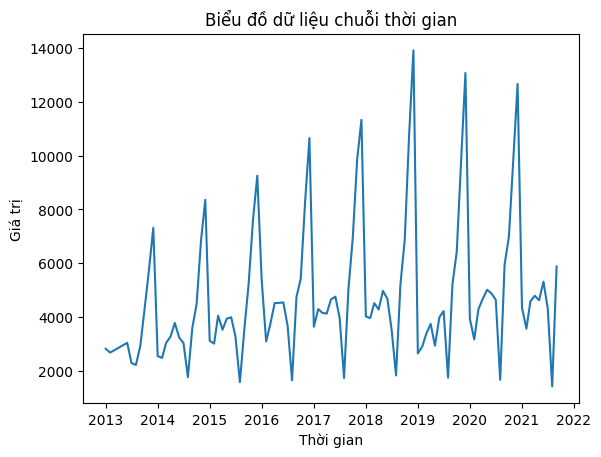

In [38]:
plt.plot(values['Month'],values['Data'])
plt.title('Biểu đồ dữ liệu chuỗi thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá trị')
plt.show()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

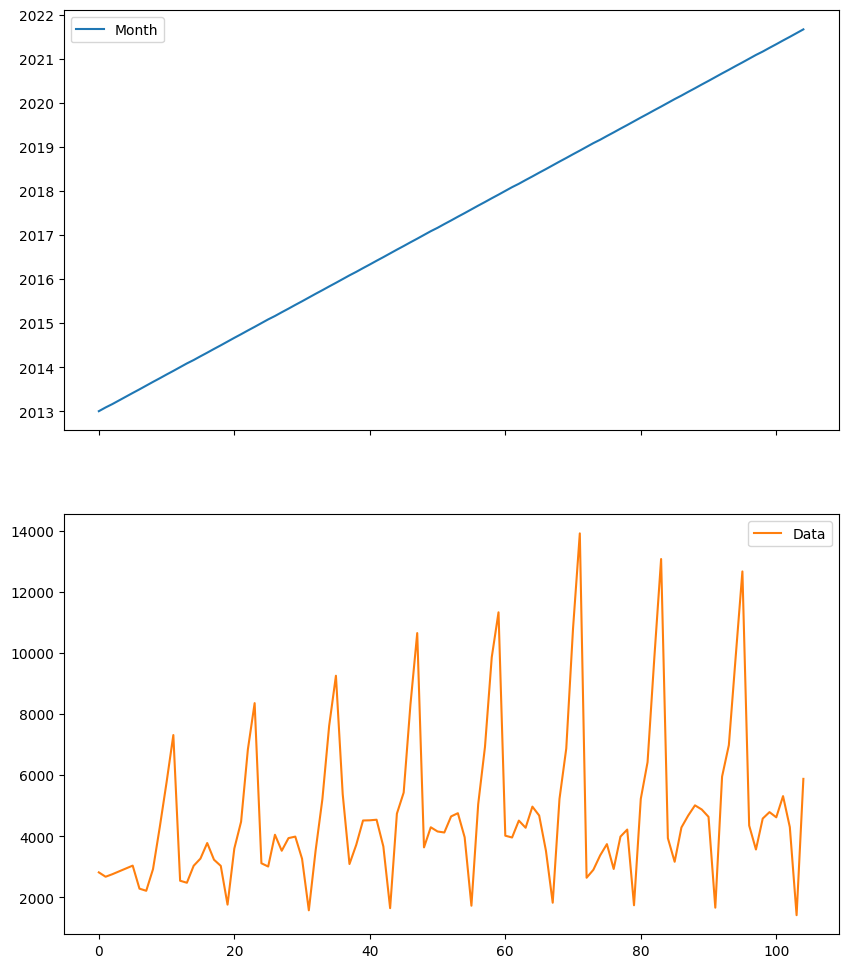

In [39]:
values.plot(subplots=True, figsize=(10, 12))

In [40]:
features.Data__sum_values[0]

494254.0

In [41]:
df.fillna(0, inplace=True)
df.fillna(method='ffill', inplace=True)  # Điền giá trị trước
df.fillna(method='bfill', inplace=True)  # Điền giá trị sau
mean_value = df['column_name'].mean()
df['column_name'].fillna(mean_value, inplace=True)

median_value = df['column_name'].median()
df['column_name'].fillna(median_value, inplace=True)

std_value = df['column_name'].std()

df['column_name'].fillna(std_value, inplace=True)
df['column_name'].fillna('Unknown', inplace=True, mask=df['column_name'].notnull())


NameError: name 'df' is not defined